## Simulation model

We implement a simulation model for a 6DoF satellite based on Fossen

In [9]:
import numpy as np

In [10]:
# def _skew_matrix(vec):
#     """Makes a 3x3 skew-symmetric matrix from the 3x1 vector vec"""
#     v1, v2, v3 = vec
#     return np.array([
#         [0, -v3, v2], 
#         [v3, 0, -v1], 
#         [-v2, v1, 0]])

# def dynamics(state, action):
#     """
#     state: 12 x 1 numpy ndarray [nu, eta], consisting of (positions, angles) and (velocities, angular velocities) respectively
#     actions: 6 x 1 numpy ndarray consisting of translatory and angular accelerations
#     """
#     mass = 1.0
#     length = 0.2

#     M_rigid_body_CG = np.block([mass * np.eye(3), (mass / 6) * (length ** 2) * np.eye(3)])
#     C_rigid_body_CG = np.
# TODO: Implement T-matrix based on quaternions

# TODO: Implement kinematics equation


# TODO: Implement kinetics differential equation with accelerations as input

## Implement 3DoF model
We implement a simple 3-DoF model consisting of surge $u$ sway $v$ and yaw $\psi$ (and their derivatives) using Fossens models.

In [11]:
import gym_auv.utils.geomutils as geom
import gym_auv.utils.constants as const

In [12]:
# Implement 3dof model
# nu = [x, y, psi]
# eta = [u, v, r]

THRUST_MIN = 0
THRUST_MAX = 2
RUDDER_MIN = -0.15
RUDDER_MAX = -RUDDER_MIN

def dynamics(eta, nu, action):
    # thrust = np.clip(action[0], THRUST_MIN, THRUST_MAX)
    # rudder = np.clip(action[1], RUDDER_MIN, RUDDER_MAX)
    thrust = action[0]
    rudder = action[1]

    psi = eta[2]
    # tau = np.array([thrust, 0, rudder])

    eta_dot = geom.Rz(geom.princip(psi)).dot(nu)
    nu_dot = const.M_inv.dot(const.B(nu).dot(action) - const.C(nu).dot(nu) - const.D(nu).dot(nu))
    state_dot = np.concatenate([eta_dot, nu_dot])

    return state_dot



In [13]:
# Implement simulation loop
SIMULATION_LENGTH = 1000
TIMESTEP_LENGTH = 0.1

init_heading = np.deg2rad(-45)
init_state = np.array([0, 0, init_heading, 0, 0, 0])
state = init_state

state_trajectory = []
timesteps = []

def policy(eta, nu):
    # Straight ahead, and a bit to the right
    return np.array([2, 0.2])

for t in np.arange(0, SIMULATION_LENGTH, TIMESTEP_LENGTH):
    state_trajectory.append(state)
    timesteps.append(t)

    eta, nu = state[:3], state[3:]
    action = policy(nu, eta)

    # Do timestep. Use Euler integration for now
    h = TIMESTEP_LENGTH
    state_dot = dynamics(eta, nu, action)
    state = state + h * state_dot
    
    # Get principal angle for yaw
    state[2] = geom.princip(state[2])

    if t % 100 == 0:
        print(t, state)

state_trajectory = np.array(state_trajectory)


0.0 [ 0.00000000e+00  0.00000000e+00 -7.85398163e-01  7.75193798e-03
  7.29952574e-04 -4.26780872e-03]
100.0 [-2.41296383 -2.79357158  0.8344632   0.27901346  0.26821768 -0.17668925]
200.0 [-0.97929873 -4.76613368  2.01509378  0.27901346  0.26821768 -0.17668925]
300.0 [ 1.39030014 -4.19046185 -3.08746095  0.27901346  0.26821768 -0.17668925]
400.0 [ 1.75914962 -1.77999573 -1.90683037  0.27901346  0.26821768 -0.17668925]
500.0 [-0.32987156 -0.52206594 -0.72619979  0.27901346  0.26821768 -0.17668925]
600.0 [-2.28780483 -1.97564572  0.45443078  0.27901346  0.26821768 -0.17668925]
700.0 [-1.68815102 -4.33928956  1.63506136  0.27901346  0.26821768 -0.17668925]
800.0 [ 0.72592895 -4.68369446  2.81569194  0.27901346  0.26821768 -0.17668925]
900.0 [ 1.96262577 -2.58203372 -2.28686279  0.27901346  0.26821768 -0.17668925]


In [14]:
state_trajectory[:, 1].shape

(10000,)

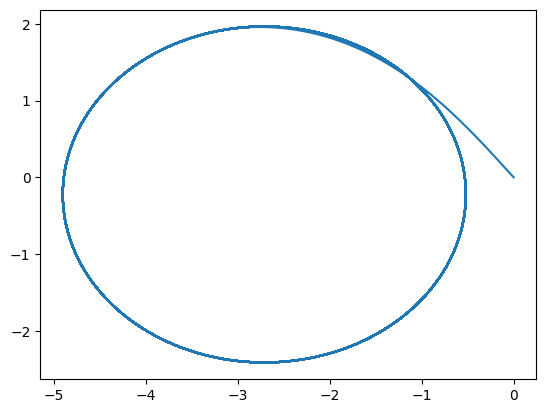

In [15]:
# Plot the trajectory
import matplotlib.pyplot as plt

plt.plot(state_trajectory[:, 1], state_trajectory[:, 0])

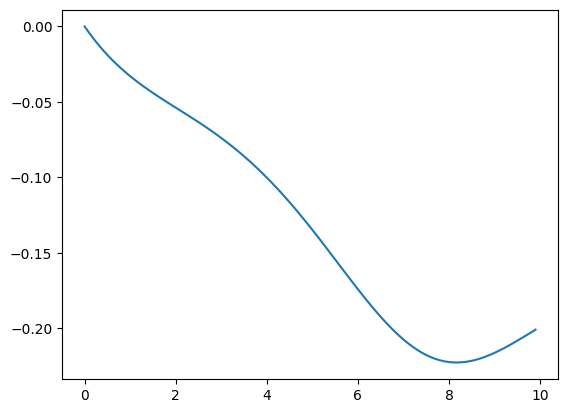

In [17]:
plt.plot(timesteps[:100], state_trajectory[:100,5])